Yapmak istediğimiz şey,SVM ile iç içe geçmiş o iki datayı birbirinden ayırmak

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
if 'id' in data.columns and 'Unnamed: 32' in data.columns:
    data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
    print("Sütunlar başarıyla silindi.")
    print(data.head())
else:
    print("Belirtilen sütunlar mevcut değil.")


Sütunlar başarıyla silindi.
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...  

In [ ]:
#eşleştirme yapıldı
M=data[data.diagnosis=='M']
B=data[data.diagnosis=='B']

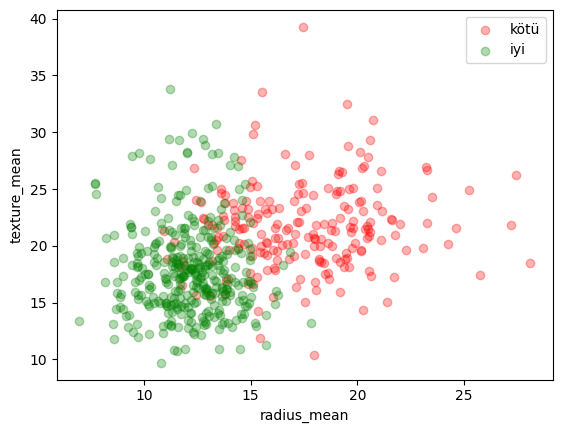

In [ ]:
plt.scatter(M.radius_mean,M.texture_mean,color='red',label='kötü',alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color='green',label='iyi',alpha=0.3)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()
plt.show()


In [ ]:
# M ve B string değerler ama biz classification yani sınıflandırma yaparken M=1,B=0 yazpıyoruz
data.diagnosis=[1 if each=='M' else 0 for each in data.diagnosis]
y=data.diagnosis.values #label datası
x_data=data.drop(['diagnosis'],axis=1)#future datası

In [ ]:
#normalizasyon
import numpy as np

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [ ]:
print('accuracy of svm algo :',svm.score(x_test,y_test))

accuracy of svm algo : 0.9649122807017544
